# Технологическая практика

## Визуализация результатов обработки данных

Первые три задания работаем с набором данных, который содержит всех новорожденных и их имена в CША. Последние два задания делаем на уже известном вам датасете про индийских женщин и диабет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

babies = pd.read_csv('babies_all.txt', index_col=0)
pima = pd.read_csv('pima-indians-diabetes.csv')


/home/dima/botva/1semestr/technological_prackt/MLS/mls/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
babies.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет


In [45]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
years = babies["year"].unique()

2) Какое имя в датасете находится по индексом 121?

In [27]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies["name"][121:122]

121    Ann
Name: name, dtype: object

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [6]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies["number"][babies["name"] == "Aaron"].sum()

527668

4) Насколько больше за все время родилось мальчиков чем девочек?

In [103]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies['number'][babies['sex'] == 'M'].sum() - babies['number'][babies['sex'] == 'F'].sum()

2422447

5) Cколько мальчиков родилось в 2010?

In [104]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies['number'][(babies['sex'] == 'M') & (babies['year'] == 2010)].sum() 

1898382

6) Сколько в датасете девочек по имени John?

In [105]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies['number'][(babies['sex'] == 'F') & (babies['name'] == "John")].sum() 

21578

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


In [10]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies_girls = pd.DataFrame(0,columns=["number"], index=years)
babies_boys = pd.DataFrame(0, columns=["number"], index=years)
babies_girls['number'] = [babies['number'][(babies['year'] == year) & (babies['sex'] == 'F')].sum() for year in years]
babies_boys['number'] = [babies['number'][(babies['year'] == year) & (babies['sex'] == 'M')].sum() for year in years]

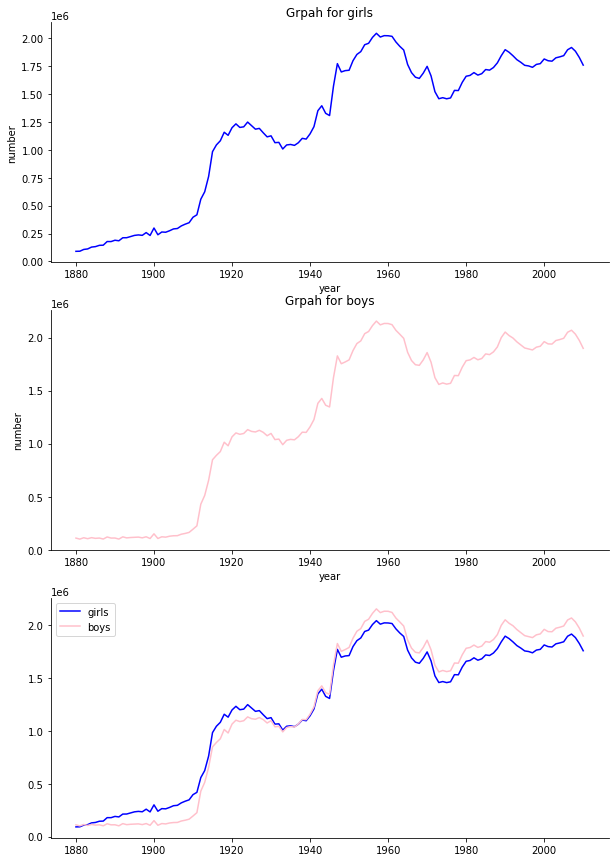

In [20]:
color = ['blue', 'pink']
label = ["girls", "boys"]
fig, axs = plt.subplots(3, 1,figsize=(10,15))
for i, data in enumerate([babies_girls, babies_boys]):
    axs[i].plot(years, data['number'], c=color[i])
    axs[2].plot(years, data['number'], c=color[i], label=label[i])
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].axes.set_title(f"Grpah for {label[i]}")
    axs[i].axes.set_xlabel('year')
    axs[i].axes.set_ylabel("number")
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
plt.legend()

До начала второй мирой войны видно количественное преимущество рождаемости девочек, но потом количество рождаемости мальчиков стала больше. Что также интересно кривые рождаемости идентичны друг другу. В период холодной войны (1960-1970 годы) произошел резкий спад рождаемости. Также тенденция уменьшения рождаемости видна во второй половине "нулевых" (2000-2010). 

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



In [47]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
dfNamesGirls = babies[babies['sex']=='F'].groupby(['name']).count().sort_values('number', ascending=False)
dfNamesBoys = babies[babies['sex']=='M'].groupby(['name']).count().sort_values('number', ascending=False)

NameGirls = list(dfNamesGirls[:2].reset_index()['name'])
NameBoys = list(dfNamesBoys[:2].reset_index()['name'])

print('Имена девочек:', NameGirls)
print('Имена мальчиков:', NameBoys)

Имена девочек: ['Jessie', 'Corrine']
Имена мальчиков: ['Ezra', 'Wade']


In [48]:
babies_jessie = babies[(babies['name']=='Jessie') & (babies['sex']=='F')][['number','year']]
babies_jessie = babies_jessie.set_index('year')
babies_jessie = babies_jessie.rename(columns={'number': 'number (Jessie)'})

babies_сorrine = babies[(babies['name']=='Corrine') & (babies['sex']=='F')][['number','year']]
babies_сorrine = babies_сorrine.set_index('year')
babies_сorrine = babies_сorrine.rename(columns={'number': 'number (Corrine)'})


babies_ezra = babies[(babies['name']=='Ezra') & (babies['sex']=='M')][['number','year']]
babies_ezra = babies_ezra.set_index('year')
babies_ezra = babies_ezra.rename(columns={'number': 'number (Ezra)'})


babies_wade = babies[(babies['name']=='Wade') & (babies['sex']=='M')][['number','year']]
babies_wade = babies_wade.set_index('year')
babies_wade = babies_wade.rename(columns={'number': 'number (Wade)'})

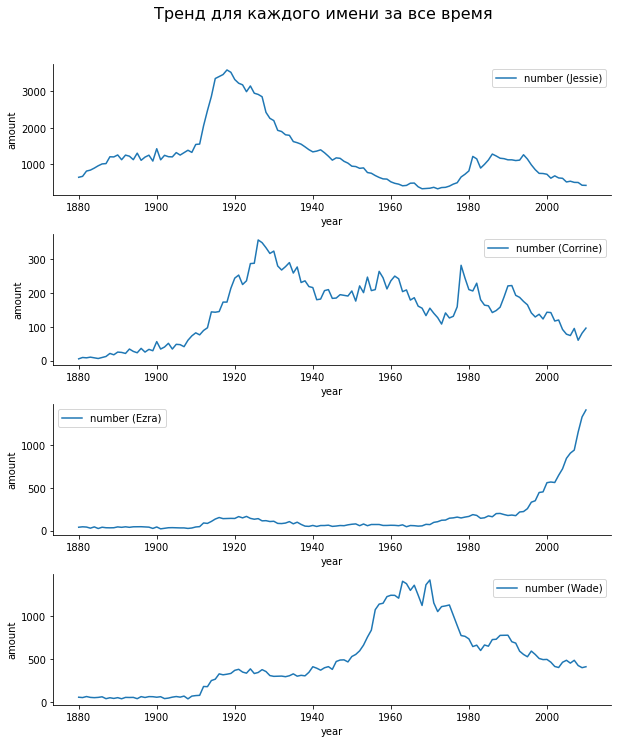

In [51]:
fig, axes = plt.subplots(4, 1,figsize=(10,10))
plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.3, wspace=0.9)
fig.suptitle('Тренд для каждого имени за все время', fontsize=16)

for i, data in enumerate([babies_jessie, babies_сorrine, babies_ezra, babies_wade]):
    data.plot(ax=axes[i], label= 'jessie')
    axes[i].set_ylabel("amount")
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)


## Задание 4

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

In [2]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies["first_letter"] = [name[0] for name in babies["name"]]
figs = list()
year_list = [1880, 1990, 2010]
for i in year_list:
    data_year = babies[babies["year"] == i]
    unique_letter = data_year["first_letter"].unique()
    fig = pd.DataFrame(index=unique_letter)
    fig["number"] = [data_year["number"][data_year["first_letter"] == i].sum() for i in unique_letter]
    figs.append(fig)


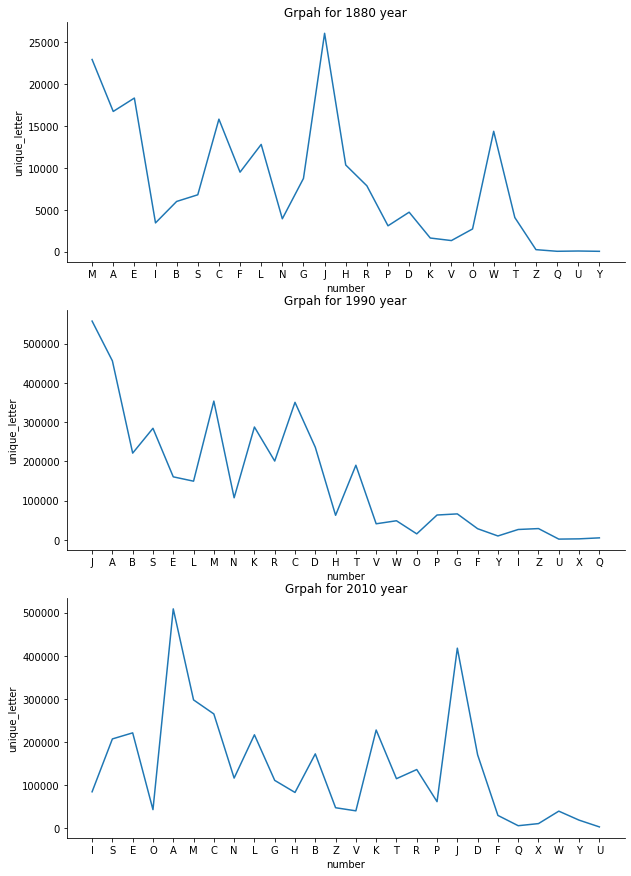

In [14]:
fig, axs = plt.subplots(3, 1,figsize=(10,15))
for i, data in enumerate(figs):
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].plot(data.index, data['number'])
    axs[i].axes.set_title(f"Grpah for {year_list[i]} year")
    axs[i].axes.set_xlabel('number')
    axs[i].axes.set_ylabel("unique_letter")

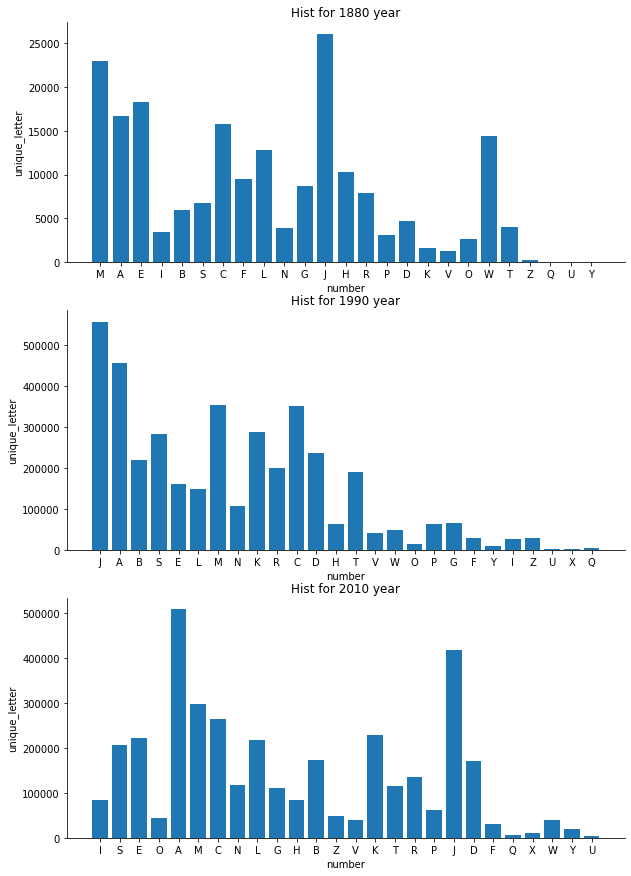

In [15]:
fig, axs = plt.subplots(3, 1,figsize=(10,15))
for i, data in enumerate(figs):
    axs[i].bar(data.index, data['number'])
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].axes.set_title(f"Hist for {year_list[i]} year")
    axs[i].axes.set_xlabel('number')
    axs[i].axes.set_ylabel("unique_letter")

По гистограммам видно, что самые полпулярные первые буквы имени были:в 1880 и 1990 году "J"; в 2010 году "A".

## Задание 5

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


In [21]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Text(0, 0.5, 'BMI')

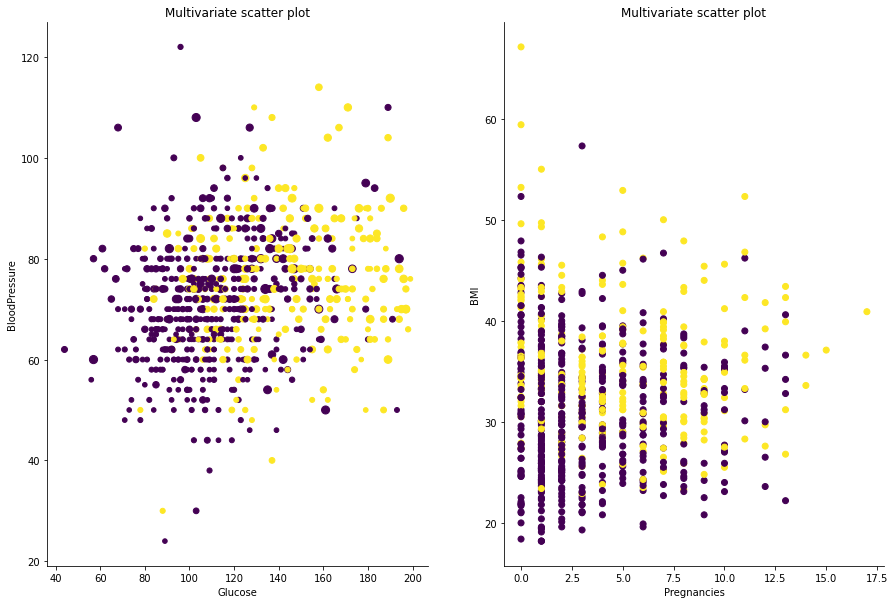

In [9]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
x = [pima["Glucose"], pima["Pregnancies"]]
y = [pima["BloodPressure"], pima['BMI']]
size = pima["Age"]
color = pima["Class"]

fig, axs = plt.subplots(1, 2, figsize=(15,10))

axs[0].scatter(x[0], y[0], s=size, c=color)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].axes.set_title("Multivariate scatter plot")
axs[0].axes.set_xlabel('Glucose')
axs[0].axes.set_ylabel("BloodPressure")

axs[1].scatter(x[1], y[1], c=color)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].axes.set_title("Multivariate scatter plot")
axs[1].axes.set_xlabel('Pregnancies')
axs[1].axes.set_ylabel("BMI")


По первому графику видно, что наличие диабета доминирует у людей с высоким показателем глюкозы.
По второму графику видно, что диабетом меньше болеют люди с низким количеством беременностей (1-3) и меньшим индексом тела

## Дополнительное задание

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одним объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

Text(0, 0.5, 'BMI, Glucose')

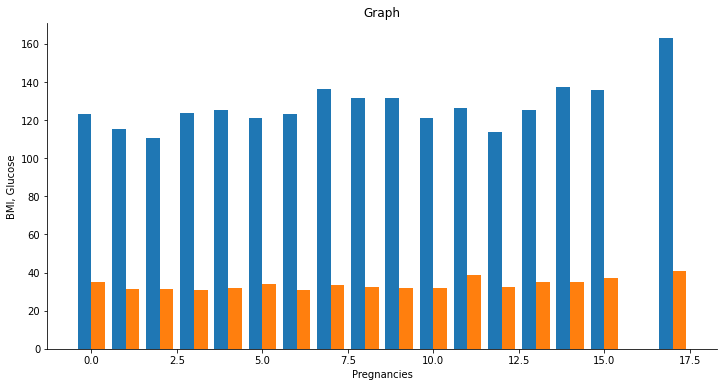

In [43]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
unique = pima["Pregnancies"].unique()
mean_glucose = [pima["Glucose"][pima["Pregnancies"] == i].mean() for i in unique]
mean_bmi = [pima["BMI"][pima["Pregnancies"] == i].mean() for i in unique]
data = pd.DataFrame(index=np.sort(unique))
data['mean_glucose'] = mean_glucose
data['mean_bmi'] = mean_bmi

fig, ax = plt.subplots()

ax.bar(unique-0.2, data['mean_glucose'], width = 0.4)
ax.bar(unique+0.2, data['mean_bmi'], width = 0.4)

fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.set_title("Graph")
ax.axes.set_xlabel('Pregnancies')
ax.axes.set_ylabel("BMI, Glucose")

При увелечении количества беременностей средний индекс массы тела не увеличивается и коррелирует на уровне 38.
При увелечении количества беременностей средний уровень глюкозы растет.